### COVID-19  Analysis,Visualization & predication

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Reading Data
data = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])
data.rename(columns = {'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [3]:
data.shape

(11341, 8)

In [4]:
data.dtypes

SNo                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [5]:
# Missing Values
data.isnull().sum().to_frame('nulls')

,nulls
SNo,0
Date,0
Province/State,3595
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


### Total Confirmed, Deaths and Recovered cases in the world.  22/03/2020

In [6]:
df = data.groupby(['Date','Country'])[['Date','Country','Confirmed','Deaths','Recovered']].sum().reset_index()
sorted_By_Confirmed = df.sort_values('Confirmed', ascending=False)
sorted_By_Confirmed = sorted_By_Confirmed.drop_duplicates('Country')

world_Confirmed_Total = sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total = sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total = sorted_By_Confirmed['Recovered'].sum()

Active = world_Confirmed_Total - world_Deaths_Total - world_Recovered_Total

world_Deaths_rate = (world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate = (world_Recovered_Total*100)/world_Confirmed_Total

China = sorted_By_Confirmed [sorted_By_Confirmed['Country'] =='Mainland China']
China_Recovered_rate = (int(China['Recovered'].values)*100)/int(China['Confirmed'].values)

veri = {'Total Confirmed cases in the world':world_Confirmed_Total,'Total Deaths cases in the world':
        world_Deaths_Total,'Total Recovered cases in the world':world_Recovered_Total,
       'Total Active cases':Active,'Rate of Recovered cases %':world_Recovered_rate,
       'Rate of deaths cases %':world_Deaths_rate,'Rate of Recovered china cases %':China_Recovered_rate}

veri = pd.DataFrame.from_dict(veri, orient='index', columns=['Total'])

veri.style.background_gradient(cmap='Reds')

,Total
Total Confirmed cases in the world,378566
Total Deaths cases in the world,16496
Total Recovered cases in the world,100721
Total Active cases,261349
Rate of Recovered cases %,26.6059
Rate of deaths cases %,4.3575
Rate of Recovered china cases %,89.6358


### Graphic that illustrates Increasing infections cases per day

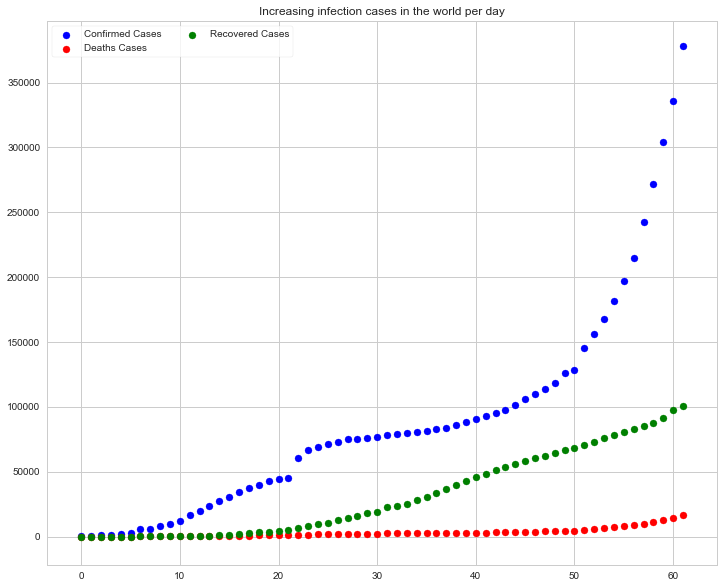

In [7]:
cases_per_Day = data.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum().reset_index()
sorted_By_Confirmed1 = cases_per_Day.sort_values('Date', ascending=False)

x = cases_per_Day.index
y = cases_per_Day.Confirmed
y1 = cases_per_Day.Deaths
y2 = cases_per_Day.Recovered

sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

plt.scatter(x,y,color='blue', label= 'Confirmed Cases')
plt.scatter(x,y1,color='red', label= 'Deaths Cases')
plt.scatter(x,y2,color='green', label='Recovered Cases')
plt.title('Increasing infection cases in the world per day')

ax.legend(ncol=2, loc='upper left', frameon=True)
plt.show()

### Table that illustrates Increasing infections cases in the world per day

In [8]:
sorted_By_Confirmed1.style.background_gradient(cmap='Reds')

,Date,Confirmed,Deaths,Recovered
61,03/23/2020,378287,16497,100958
60,03/22/2020,335957,14634,97882
59,03/21/2020,304528,12973,91676
58,03/20/2020,272167,11299,87403
57,03/19/2020,242713,9867,84962
56,03/18/2020,214915,8733,83313
55,03/17/2020,197168,7905,80840
54,03/16/2020,181546,7126,78088
53,03/15/2020,167447,6440,76034
52,03/14/2020,156099,5819,72624


### Corona Virus with Numbers
* Confirmed -- Cumulative number of confirmed cases till that date
* Deaths -- Cumulative number of deaths till that date
* Recovered -- Cumulative number of recovered cases till that date
* Active -- Active Cases
* Recovered Cases Rate % -- rate of Recovered Cases from total of Confirmed cases in same Country
* Deaths Cases Rate % -- rate of death Cases from total of Confirmed cases in same Country
* Total Cases Rate % -- rate of total cases from Total cases in the world

In [9]:
Recovered_rate = (sorted_By_Confirmed['Recovered'] *100)/sorted_By_Confirmed['Confirmed']
Deaths_rate = (sorted_By_Confirmed['Deaths'] *100)/sorted_By_Confirmed['Confirmed']
case_rate = (sorted_By_Confirmed.Confirmed *100)/world_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered Cases Rate %'] = pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %'] = pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %'] = pd.DataFrame(case_rate)

print('Sorted By Confirmed Cases , Scroll table down')
sorted_By_Confirmed.style.background_gradient(cmap='Greens')

Sorted By Confirmed Cases , Scroll table down


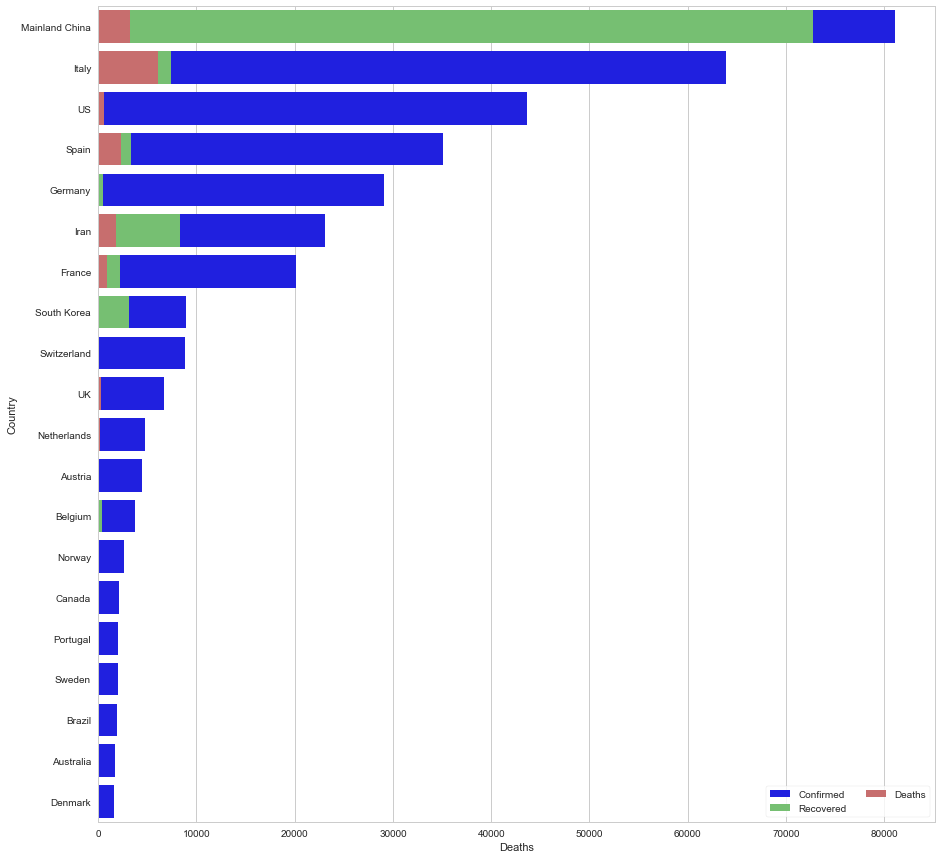

In [10]:
sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

sns.barplot(x='Confirmed',y='Country', data=sorted_By_Confirmed.head(20),
           label='Confirmed', color='b')

# Plot the crashes where alcohol was involved
sns.set_color_codes('muted')
sns.barplot(x='Recovered', y='Country',data=sorted_By_Confirmed.head(20),
           label='Recovered', color='g')

sns.set_color_codes('muted')
sns.barplot(x='Deaths', y='Country', data=sorted_By_Confirmed.head(20),
           label='Deaths', color='r')

# Add a legend and informative axis label
ax.legend(ncol=2, loc='lower right', frameon = True)

### What happened is one day(New Cases | New Deaths)- 03/26/2020
Difference between 25/03 and 26/26

In [11]:
df_Difference = data.groupby(['Date','Country'])[['Date','Country','Confirmed','Deaths']].sum().reset_index()
sorted_By_Confirmed_Difference = df_Difference.sort_values('Country', ascending=False)

x1 = sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/26/2020'].reset_index().drop('index',axis=1)
x2 = sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/25/2020'].reset_index().drop('index',axis=1)

h=pd.merge(x2,x1,on='Country')
h['New Confirmed Cases']=h['Confirmed_y']-h['Confirmed_x']
h['New Deaths']=h['Deaths_y']-h['Deaths_x']

h1 = h.sort_values('New Confirmed Cases', ascending=False).head(50)
h1=h1.drop(['Confirmed_x','Deaths_x','Date_x','Confirmed_y','Deaths_y'],axis=1).style.background_gradient(cmap='Green')
print('The New Cases in 26/03')
h1

The New Cases in 26/03


,Date_y,Country,New Confirmed Cases,New Deaths


### Top 10 infected Countries

Text(0.5,1,'Total Cases / Deaths / Recovered')

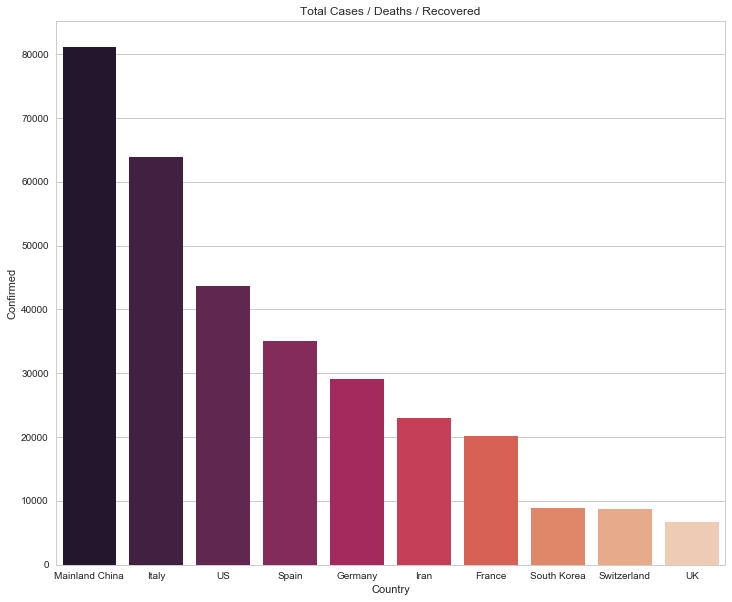

In [12]:
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.Country
y=sorted_By_Confirmed1.Confirmed
plt.rcParams['figure.figsize'] = (12,10)
sns.barplot(x,y,order=x,palette='rocket').set_title('Total Cases / Deaths / Recovered')

### Cases Rate per country of the total in the world 

cases rate per country of the total cases in the world


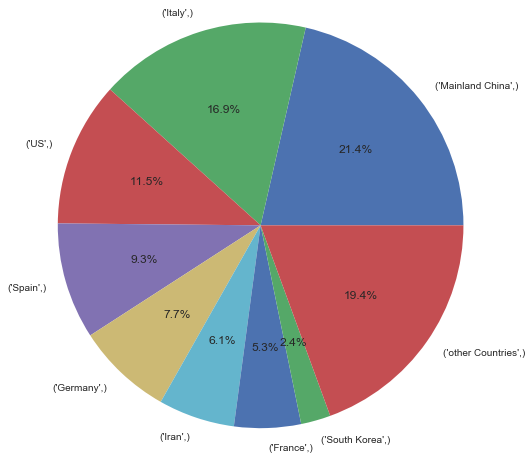

In [13]:
Top7 = sorted_By_Confirmed.iloc[0:8,-1].values
others = sorted_By_Confirmed.iloc[8:,-1].sum()
x=np.array(Top7)
x2=np.array(others)
rates = np.concatenate((x,x2),axis=None)

rate_perCountry = pd.DataFrame(data=rates,index=[sorted_By_Confirmed['Country'].head(9)],columns=['rate'])
rate_perCountry.rename(index={'Switzerland':'other Countries'}, inplace=True)

labels = rate_perCountry.index
sizes = rate_perCountry['rate'].values

explode = None # Explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes,explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
print('cases rate per country of the total cases in the world')
plt.show()

### Graphic that  illustrates increasing infections cases per days

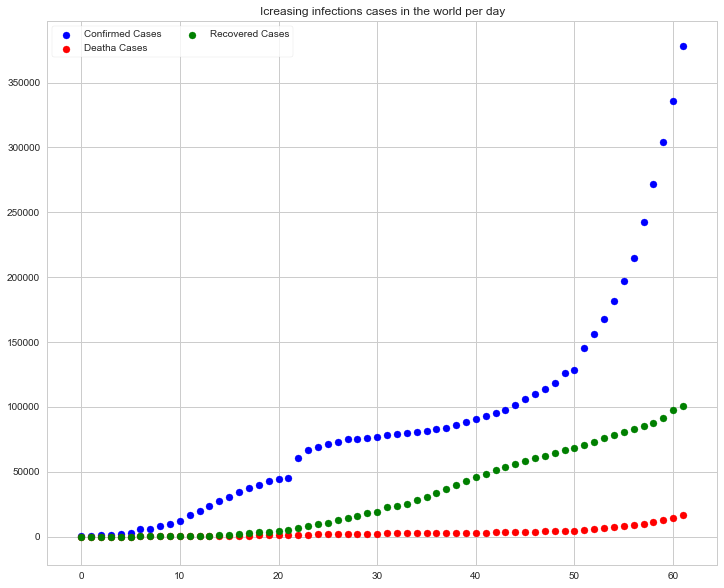

In [14]:
cases_per_Day = data.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum().reset_index()
sorted_By_Confirmed1 = cases_per_Day.sort_values('Date', ascending=False)

x=cases_per_Day.index

y=cases_per_Day.Confirmed
y1=cases_per_Day.Deaths
y2=cases_per_Day.Recovered

sns.set(style='whitegrid')

#Initialze the matplotlib
f,ax = plt.subplots(figsize =(12,10))
plt.scatter(x,y,color='blue', label='Confirmed Cases')
plt.scatter(x,y1,color='red', label='Deatha Cases')
plt.scatter(x,y2,color='green', label='Recovered Cases')
plt.title('Icreasing infections cases in the world per day')
ax.legend(ncol=2,loc='upper left',frameon=True)

plt.show()

### Table that illustrates increasing infectiona cases in the world per day

In [15]:
sorted_By_Confirmed1.style.background_gradient(cmap='Reds')

,Date,Confirmed,Deaths,Recovered
61,03/23/2020,378287,16497,100958
60,03/22/2020,335957,14634,97882
59,03/21/2020,304528,12973,91676
58,03/20/2020,272167,11299,87403
57,03/19/2020,242713,9867,84962
56,03/18/2020,214915,8733,83313
55,03/17/2020,197168,7905,80840
54,03/16/2020,181546,7126,78088
53,03/15/2020,167447,6440,76034
52,03/14/2020,156099,5819,72624


### Prediction Future cases

In [16]:
# Train and Test
x_data = pd.DataFrame(cases_per_Day.index)
y_data = pd.DataFrame(cases_per_Day.Confirmed)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=0)

### Polynomail Regression to predict future cases.

In [18]:
# Polynomial Regression (degree=5)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Graphic

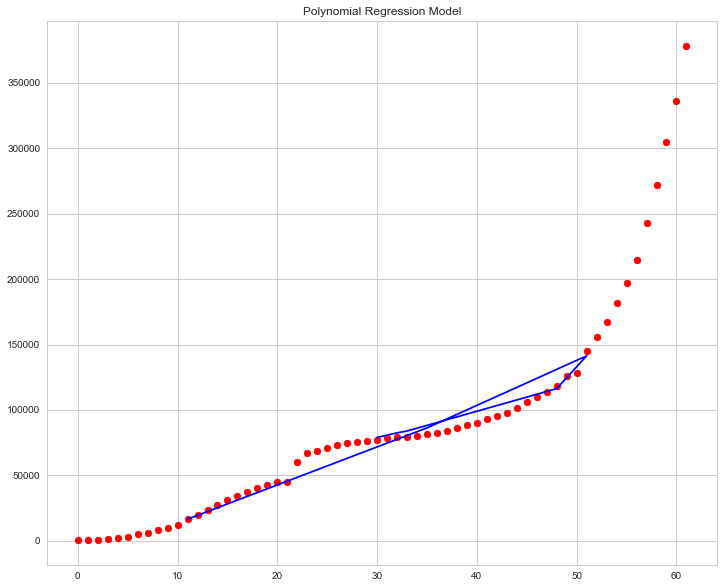

In [21]:
cases_per_Day = data.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum().reset_index()
sorted_By_Confirmed1 = cases_per_Day.sort_values('Date', ascending=False)

x=cases_per_Day.index
y=cases_per_Day.Confirmed

plt.scatter(x,y,color='red')
plt.plot(x_test,lin_reg2.predict(poly_reg.fit_transform(x_test)),color='blue')
plt.title('Polynomial Regression Model')
plt.show()

### Test algorithm

In [23]:
y_pred = lin_reg2.predict(poly_reg.fit_transform(x_test))

result = pd.DataFrame(y_pred)
result['Real Value'] = y_test.iloc[:,:].values
result['Predicted Value']=pd.DataFrame(y_pred)
result = result[['Real Value','Predicted Value']]
result

,Real Value,Predicted Value
0,76843.0,79048.831902
1,78985.0,82498.586467
2,79570.0,83929.516255
3,118582.0,116350.074920
4,145193.0,141389.218263
5,81397.0,86318.897110
6,16787.0,16560.819539


In [24]:
from sklearn.metrics import r2_score
print('Polynomial Regression R2 Score :',r2_score(y_test,y_pred))

Polynomial Regression R2 Score : 0.9916275763956475


### Make Predict For Future Days

In [40]:
print('After {0} day will be {1} case in the world'.format((70-len(cases_per_Day)),
lin_reg2.predict(poly_reg.fit_transform([[70]]))))
print('After {0} day will be {1} case in the world'.format((77-len(cases_per_Day)),
lin_reg2.predict(poly_reg.fit_transform([[77]]))))
print('After {0} day will be {1} case in the world'.format((87-len(cases_per_Day)),
lin_reg2.predict(poly_reg.fit_transform([[87]])))) 
print('After {0} day will be {1} case in the world'.format((97-len(cases_per_Day)),
lin_reg2.predict(poly_reg.fit_transform([[97]]))))
print('After {0} day will be {1} case in the world'.format((107-len(cases_per_Day)),
lin_reg2.predict(poly_reg.fit_transform([[107]]))))

After 8 day will be [[973532.79478302]] case in the world
After 15 day will be [[1899730.12812815]] case in the world
After 25 day will be [[4368961.48766573]] case in the world
After 35 day will be [[8920929.20797175]] case in the world
After 45 day will be [[16618573.60114047]] case in the world
